# Kmeans Clustering definition

## importing libraries and dataset

In [25]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.metrics import euclidean_distances
from sklearn.metrics.cluster import contingency_matrix
data = load_iris(return_X_y=True)
X = data[0]
y = data[1]
print(X.shape)
print(y.shape)

(150, 4)
(150,)


## Initializing centers

In [46]:
n_clusters = 3

randomIndices = np.random.randint(len(y), size = (n_clusters))
print('RandomIndices: ', randomIndices)
init_centers = X[randomIndices]
print('Initial Centers: ', init_centers)


RandomIndices:  [105  58  96]
Initial Centers:  [[7.6 3.  6.6 2.1]
 [6.6 2.9 4.6 1.3]
 [5.7 2.9 4.2 1.3]]


## Iterating over array to calculate Kmeans centers

In [47]:
max_iter = 30
tol = 0.0001

labels_ = np.full(y.shape, -1)
itr = 0
centers = init_centers
while itr < max_iter:
    print(centers)
    itr += 1

    for i in range(len(y)):
        labels_[i] = np.argmin(euclidean_distances([X[i]], centers)[0])

    next_centers = np.array([np.mean(X[labels_ == l], axis=0) for l in np.unique(labels_)])

    if(np.mean(np.abs(next_centers - centers)) < tol):
        break

    centers = next_centers

[[7.6 3.  6.6 2.1]
 [6.6 2.9 4.6 1.3]
 [5.7 2.9 4.2 1.3]]
[[7.15       3.12       6.09       2.135     ]
 [6.40227273 2.90909091 4.975      1.71363636]
 [5.25348837 3.11860465 2.59302326 0.71860465]]
[[7.08695652 3.12608696 6.01304348 2.14347826]
 [6.11323529 2.83970588 4.71617647 1.59411765]
 [5.04745763 3.28135593 1.77457627 0.37627119]]
[[6.95       3.10666667 5.86666667 2.15333333]
 [6.01044776 2.7880597  4.55223881 1.49104478]
 [5.00566038 3.36981132 1.56037736 0.29056604]]
[[6.87428571 3.08857143 5.79142857 2.11714286]
 [5.93230769 2.75538462 4.42923077 1.43846154]
 [5.006      3.428      1.462      0.246     ]]
[[6.85       3.07368421 5.74210526 2.07105263]
 [5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]]


In [48]:
labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1])

## Calculating accuracy

In [49]:
c = contingency_matrix(labels_, y)
print(c)

[[ 0  2 36]
 [ 0 48 14]
 [50  0  0]]


In [50]:
np.sum(c.ravel()[np.argpartition(c.ravel(), -n_clusters)[-n_clusters:]]) / len(y)

0.8933333333333333

# Regression for bivariate data

## importing libraries and defining dataset

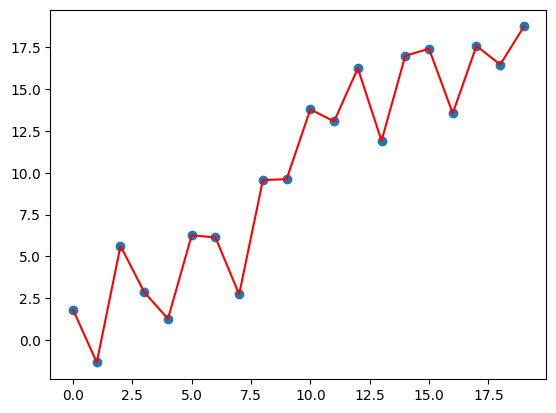

In [7]:
import matplotlib.pyplot as plt
import numpy as np
X, y = np.arange(20), (np.arange(20) + 10*(np.random.rand(20)- 0.5))
r = np.random.rand(20)
plt.scatter(X, y)
plt.plot(X, y, color='red')
plt.show()

In [29]:
def objective(X, a, b):
    return a * X*2 + b

In [30]:
from scipy.optimize import curve_fit

fit_res = curve_fit(objective, X, y)

print(fit_res[0])

[0.50362106 0.44844576]


In [31]:
a, b = fit_res[0]
print(a, b)

0.5036210614988086 0.44844575643016693


In [32]:
print('y = %.5f * x^2 + %.5f' % (a, b))

y = 0.50362 * x^2 + 0.44845


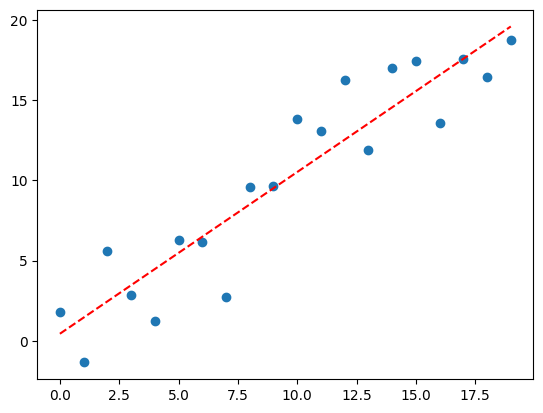

In [33]:
x_line = np.arange(20)
y_line = objective(x_line, a, b)
plt.scatter(X, y)
plt.plot(x_line, y_line,'--', color='red')
plt.show()

y = -0.01596 * x^2 + 1.31045 * x + -0.46117


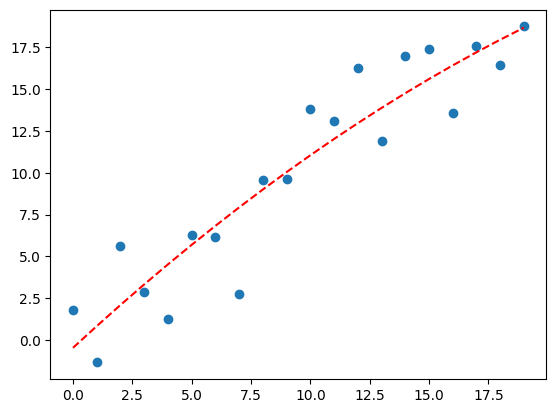

In [34]:
def objective(X, a, b, c):
    return a * X**2 + b * X + c

fit_res = curve_fit(objective, X, y)

a,b,c = fit_res[0]
print('y = %.5f * x^2 + %.5f * x + %.5f' % (a, b, c))

x_line = np.arange(20)
y_line = objective(x_line, a, b, c)
plt.scatter(X, y)
plt.plot(x_line, y_line,'--', color='red')
plt.show()


y = 0.00018 * x^5 + -0.00807 * x^4 + 0.11780 * x^3 + -0.60414 * x^2 + 1.62067 * x + 0.82977


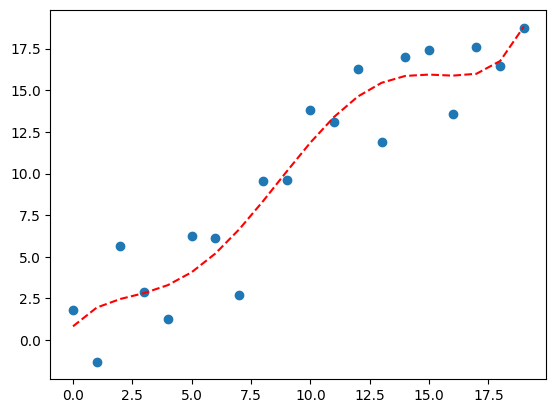

In [35]:
def objective(X, a, b, c, d, e, f):
    return a * X**5 + b * X**4 + c * X**3 + d * X**2 + e * X + f

fit_res = curve_fit(objective, X, y)

a,b,c,d,e,f = fit_res[0]
print('y = %.5f * x^5 + %.5f * x^4 + %.5f * x^3 + %.5f * x^2 + %.5f * x + %.5f' % (a, b, c, d, e, f))

x_line = np.arange(20)
y_line = objective(x_line, a, b, c, d, e, f)
plt.scatter(X, y)
plt.plot(x_line, y_line,'--', color='red')
plt.show()